<a href="https://colab.research.google.com/github/OfekGoGIT/Statistical-Theory-Project/blob/main/StatisticalTheoryProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#תיאוריה סטטיסטית
#פרויקט מסכם

**----------------------------------------------------------------------**



##The Dataset:
https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


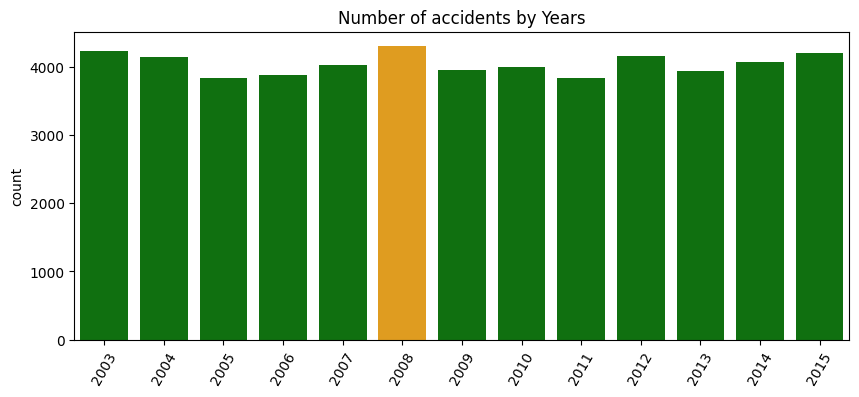

Shapiro-Wilk test for normality for Year: Statistics=0.9539954957044017, p-value=0.6598575391737826
The distribution of Year is likely normal according to Shapiro-Wilk test.
Kolmogorov-Smirnov test for normality for Year: Statistics=1.0, p-value=0.0
The distribution of Year is not normal according to Kolmogorov-Smirnov test.
Chi-Square test for uniformity for Year: Statistics=69.24950495049505, p-value=4.424361670035994e-10
The distribution of Year is not uniform.


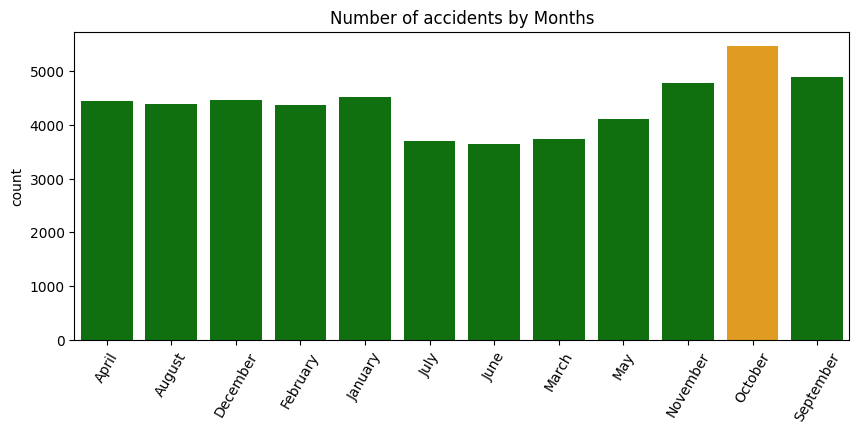

Shapiro-Wilk test for normality for Month: Statistics=0.9427137822374654, p-value=0.5340084046574856
The distribution of Month is likely normal according to Shapiro-Wilk test.
Kolmogorov-Smirnov test for normality for Month: Statistics=1.0, p-value=0.0
The distribution of Month is not normal according to Kolmogorov-Smirnov test.
Chi-Square test for uniformity for Month: Statistics=715.1507996953542, p-value=3.046205159362166e-146
The distribution of Month is not uniform.


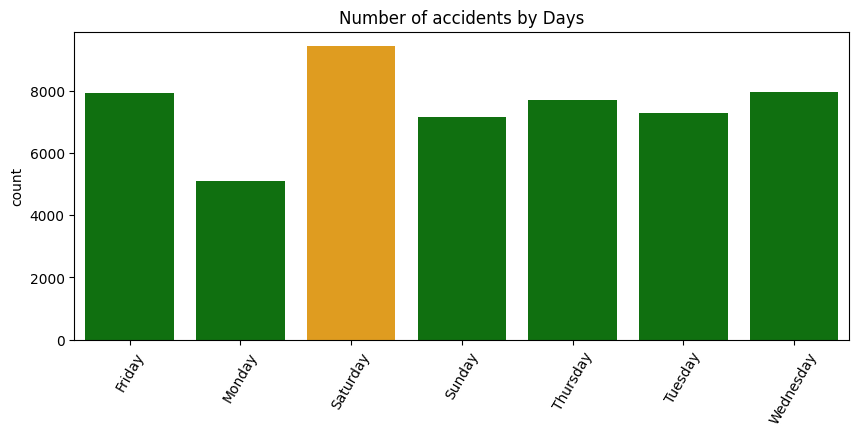

Shapiro-Wilk test for normality for Day: Statistics=0.9112102230375726, p-value=0.40431754755859883
The distribution of Day is likely normal according to Shapiro-Wilk test.
Kolmogorov-Smirnov test for normality for Day: Statistics=1.0, p-value=0.0
The distribution of Day is not normal according to Kolmogorov-Smirnov test.
Chi-Square test for uniformity for Day: Statistics=1351.9565498857576, p-value=6.1162569395928645e-289
The distribution of Day is not uniform.


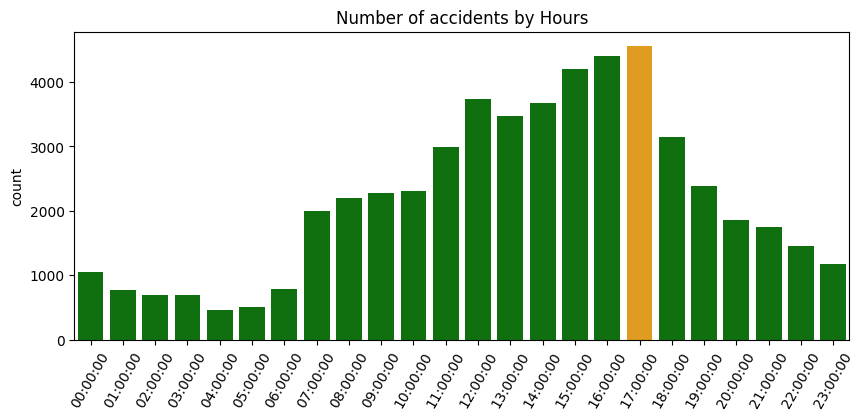

Shapiro-Wilk test for normality for Hour: Statistics=0.9295897908073127, p-value=0.0954501847557432
The distribution of Hour is likely normal according to Shapiro-Wilk test.
Kolmogorov-Smirnov test for normality for Hour: Statistics=1.0, p-value=0.0
The distribution of Hour is not normal according to Kolmogorov-Smirnov test.


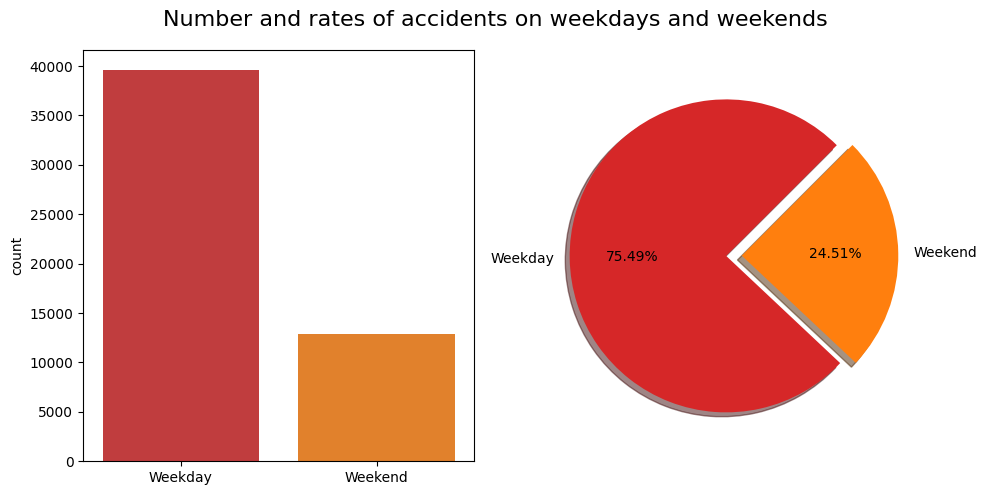

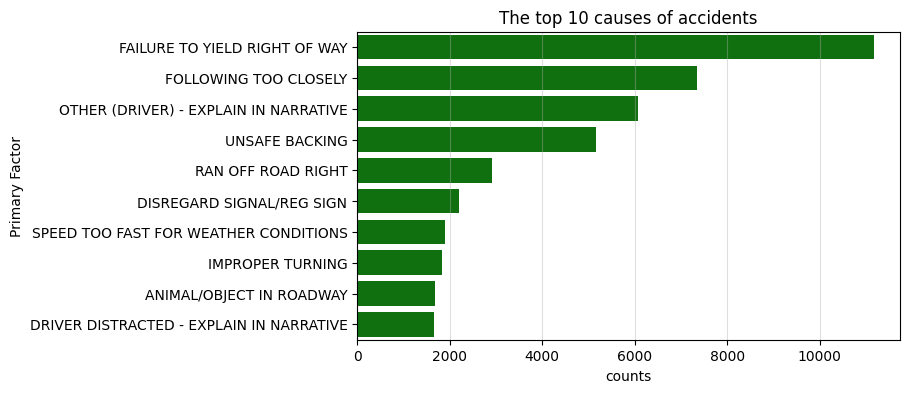

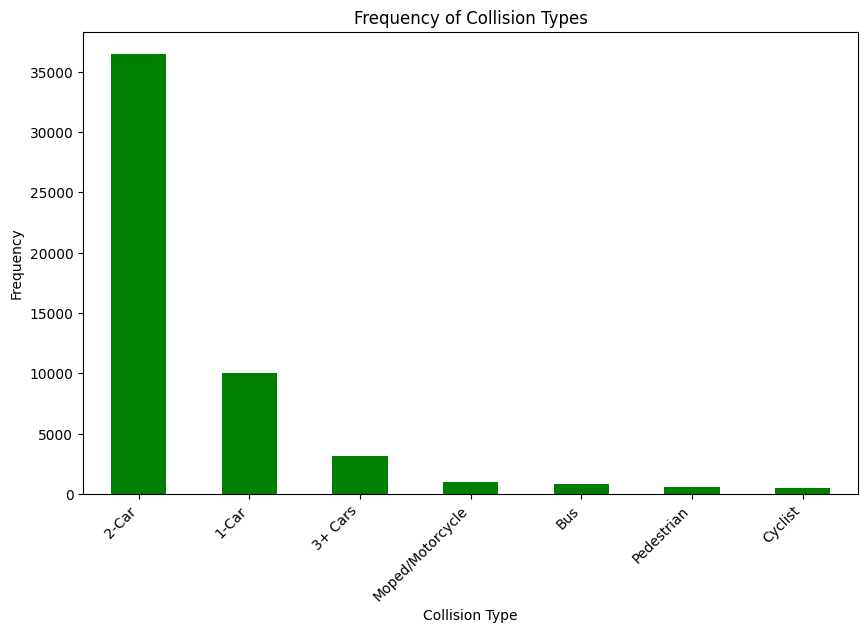

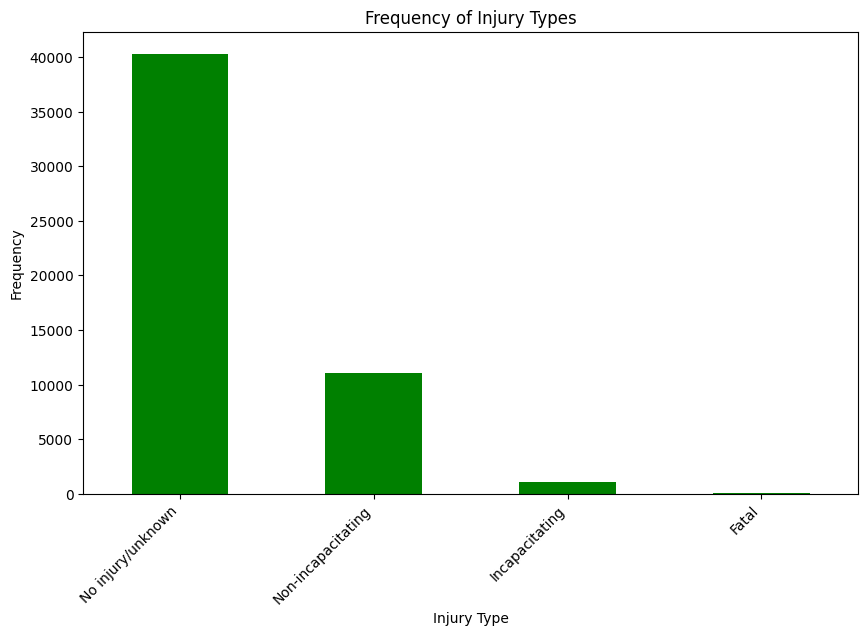

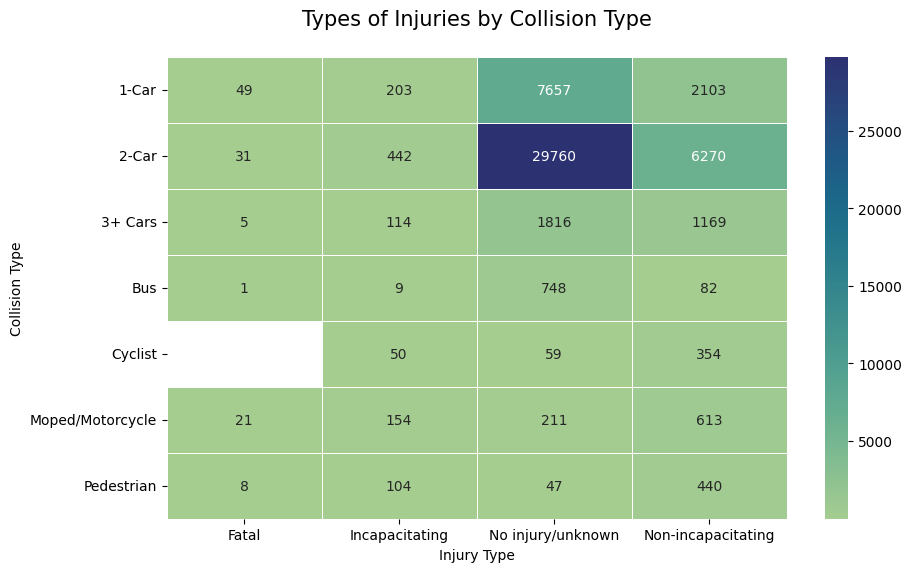

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px
from scipy.stats import shapiro, kstest, chisquare

import warnings
warnings.filterwarnings("ignore")

col_pal = sns.color_palette()
df = pd.read_excel(r'/content/new dataset.xlsx')
df.head()

df.info()

df.duplicated().sum()
df = df.drop_duplicates()
df.isnull().sum()

df.dropna(inplace=True)
df.shape

# Formatting the 'Hour' and converting 'Month' and 'Day' to names
df["Hour"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Hour"] = df["Hour"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Hour"] = pd.to_datetime(df["Hour"], format='%H:%M').dt.time
df["Month"] = df["Month"].apply(lambda x: calendar.month_name[x])
df["Day"] = df["Day"].apply(lambda x: calendar.day_name[x-1])
df.head()

group_list = ["Year", "Month", "Day", "Hour"]

for i in group_list:
    grouped = df.groupby(i)[i].count().reset_index(name="count")

    plt.figure(figsize=(10, 4))
    cols = ["green" if (j < max(grouped["count"])) else "orange" for j in grouped["count"]]
    sns.barplot(data=grouped, x=i, y="count", palette=cols)
    plt.title(f"Number of accidents by {i}s")
    plt.xticks(rotation=60)
    plt.xlabel("")
    plt.show()

    # Normality Tests
    stat_shapiro, p_value_shapiro = shapiro(grouped['count'])
    test_name_shapiro = 'Shapiro-Wilk'
    print(f'{test_name_shapiro} test for normality for {i}: Statistics={stat_shapiro}, p-value={p_value_shapiro}')
    if p_value_shapiro > 0.05:
        print(f'The distribution of {i} is likely normal according to Shapiro-Wilk test.')
    else:
        print(f'The distribution of {i} is not normal according to Shapiro-Wilk test.')

    stat_ks, p_value_ks = kstest(grouped['count'], 'norm')
    print(f'Kolmogorov-Smirnov test for normality for {i}: Statistics={stat_ks}, p-value={p_value_ks}')
    if p_value_ks > 0.05:
        print(f'The distribution of {i} is likely normal according to Kolmogorov-Smirnov test.')
    else:
        print(f'The distribution of {i} is not normal according to Kolmogorov-Smirnov test.')

    # Uniformity Tests for Year, Month, and Day
    if i in ['Year', 'Month', 'Day']:
        total = sum(grouped['count'])
        expected = [total / len(grouped)] * len(grouped)
        chi_stat, chi_p_value = chisquare(grouped['count'], f_exp=expected)
        print(f'Chi-Square test for uniformity for {i}: Statistics={chi_stat}, p-value={chi_p_value}')
        if chi_p_value > 0.05:
            print(f'The distribution of {i} is likely uniform.')
        else:
            print(f'The distribution of {i} is not uniform.')

# Define grouped_week to count accidents based on weekends
grouped_week = df.groupby("Weekend?")["Weekend?"].count().reset_index(name="count")

# Plotting number and rates of accidents on weekdays and weekends
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cols = [col_pal[3], col_pal[1]]
sns.barplot(x=grouped_week["Weekend?"], y=grouped_week["count"], palette=cols)
plt.xlabel("")
plt.subplot(1,2,2)
plt.pie(x=grouped_week["count"], labels=grouped_week["Weekend?"], shadow=True,
        explode=[0.1, 0], startangle=45, autopct='%0.2f%%', colors=cols)
plt.suptitle("Number and rates of accidents on weekdays and weekends", fontsize=16)
plt.tight_layout()
plt.show()

# Create a scatter map using latitude and longitude
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_data=["Reported_Location", "Hour", "Collision Type"],  # Customize hover data
    size_max=15,  # Set the maximum marker size
    zoom=10,  # Set the initial zoom level
    title="Geospatial Analysis of Car Crashes",
)

# Update map layout
fig.update_layout(mapbox_style="carto-positron")
fig.show()

# Analysis of top 10 causes of accidents
grouped_primary_factor = df.groupby("Primary Factor").size().reset_index(name="counts")
grouped_primary_factor = grouped_primary_factor.sort_values(by="counts", ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(data=grouped_primary_factor, x="counts", y="Primary Factor", color='green')
plt.grid(axis="x", alpha=0.4)
plt.title("The top 10 causes of accidents")
plt.show()

# Frequency of Collision Types
plt.figure(figsize=(10, 6))
df['Collision Type'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Collision Type')
plt.ylabel('Frequency')
plt.title("Frequency of Collision Types")
plt.xticks(rotation=45, ha='right')
plt.show()

# Frequency of Injury Types
plt.figure(figsize=(10, 6))
df['Injury Type'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.title('Frequency of Injury Types')
plt.xticks(rotation=45, ha='right')
plt.show()

# Types of Injuries by Collision Type
grouped_injury_type = df.groupby(["Collision Type", "Injury Type"]).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_injury_type, annot=True, linewidths=0.4, fmt=".5g", cmap="crest")
plt.title("Types of Injuries by Collision Type\n", fontsize=15)
plt.xlabel("Injury Type")
plt.ylabel("Collision Type")
plt.show()



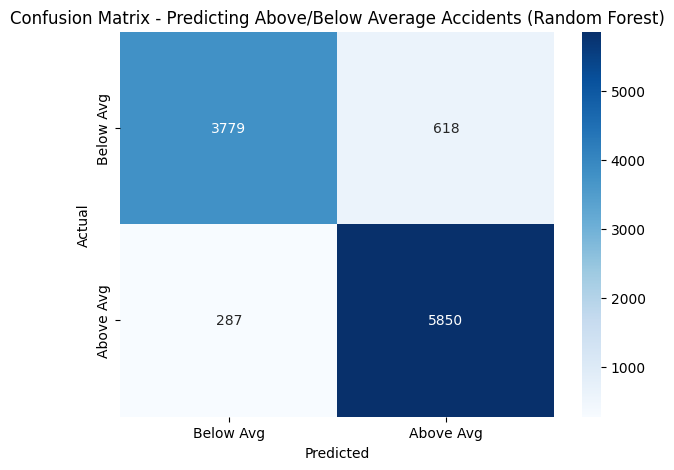

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      4397
           1       0.90      0.95      0.93      6137

    accuracy                           0.91     10534
   macro avg       0.92      0.91      0.91     10534
weighted avg       0.91      0.91      0.91     10534

Accuracy: 91.41%


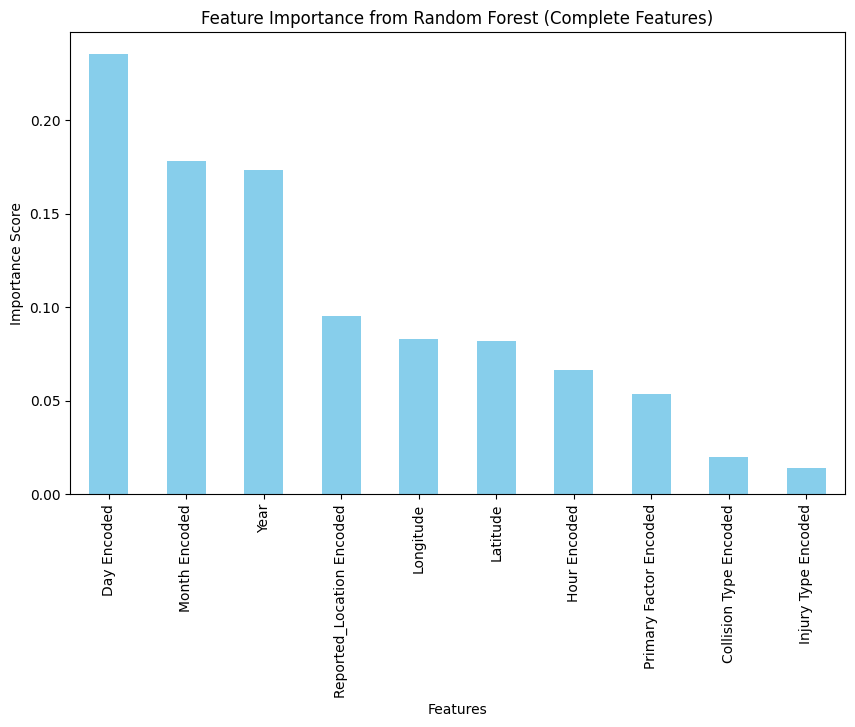

Feature Importances:
 Day Encoded                  0.235301
Month Encoded                0.178337
Year                         0.173168
Reported_Location Encoded    0.095361
Longitude                    0.082852
Latitude                     0.081673
Hour Encoded                 0.066294
Primary Factor Encoded       0.053388
Collision Type Encoded       0.019634
Injury Type Encoded          0.013991
dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'/content/new dataset.xlsx'
df = pd.read_excel(file_path)

# Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(subset=['Weekend?', 'Primary Factor', 'Collision Type'], inplace=True)
df.fillna('Unknown', inplace=True)

# Correct 'Hour' column format and handle missing values
df["Hour"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Hour"] = df["Hour"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Hour"] = pd.to_datetime(df["Hour"], format='%H:%M', errors='coerce').dt.time

# Re-convert 'Hour' column to numerical values correctly
df['Hour Encoded'] = df['Hour'].apply(lambda x: int(str(x).split(':')[0]) if pd.notnull(x) else np.nan)

# Fill missing 'Hour Encoded' values with the mode (most common hour)
hour_encoded_mode = df['Hour Encoded'].mode()[0]
df['Hour Encoded'].fillna(hour_encoded_mode, inplace=True)

# Convert Latitude and Longitude to numeric and drop invalid rows
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df.dropna(subset=['Latitude', 'Longitude'])  # Drop rows with missing geographical data

# Encode categorical features
le = LabelEncoder()
df['Day Encoded'] = le.fit_transform(df['Day'])
df['Month Encoded'] = le.fit_transform(df['Month'])
df['Collision Type Encoded'] = le.fit_transform(df['Collision Type'])
df['Injury Type Encoded'] = le.fit_transform(df['Injury Type'])
df['Primary Factor Encoded'] = le.fit_transform(df['Primary Factor'])
df['Reported_Location'] = df['Reported_Location'].astype(str).fillna('Unknown')
df['Reported_Location Encoded'] = le.fit_transform(df['Reported_Location'])

# Calculate daily accident count and target variable
daily_accidents = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Accident Count')
average_accidents = daily_accidents['Accident Count'].mean()
daily_accidents['Above Average'] = (daily_accidents['Accident Count'] > average_accidents).astype(int)
df = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Above Average']], on=['Year', 'Month', 'Day'], how='left')

# Select features and target variable
features = ['Day Encoded', 'Month Encoded', 'Latitude', 'Longitude', 'Hour Encoded',
            'Collision Type Encoded', 'Injury Type Encoded', 'Primary Factor Encoded', 'Year',
            'Reported_Location Encoded']
X = df[features]
y = df['Above Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the classification results
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title("Confusion Matrix - Predicting Above/Below Average Accidents (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Classification Report and Accuracy
print("Classification Report:\n", classification_rep)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance from Random Forest (Complete Features)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))


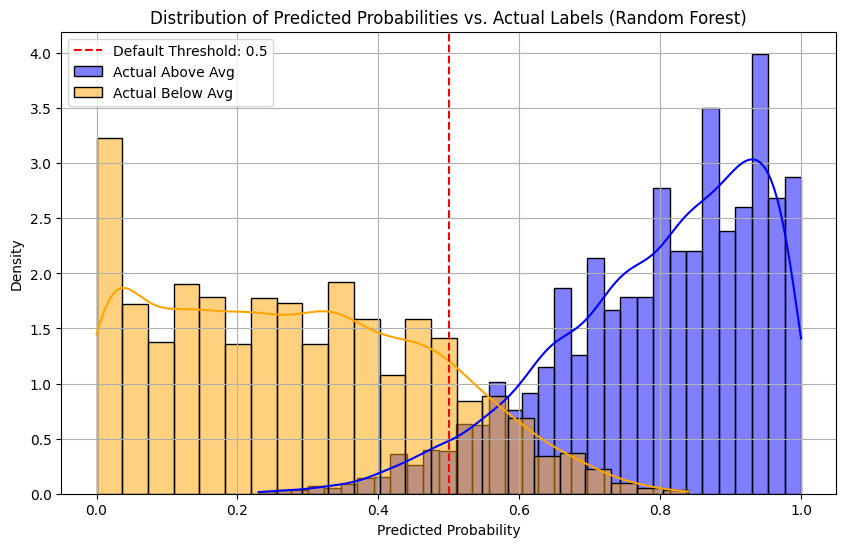

In [ ]:
# Get predicted probabilities from the Random Forest model
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Above Avg)

# Plot Distribution of Predicted Probabilities vs. Actual Labels
plt.figure(figsize=(10, 6))
sns.histplot(y_proba_rf[y_test == 1], color='blue', label='Actual Above Avg', kde=True, stat='density')
sns.histplot(y_proba_rf[y_test == 0], color='orange', label='Actual Below Avg', kde=True, stat='density')
plt.axvline(0.5, color='red', linestyle='--', label='Default Threshold: 0.5')
plt.title("Distribution of Predicted Probabilities vs. Actual Labels (Random Forest)")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


Summary of Model Results:
                  Model  Accuracy Success Percentage  R-Squared
0  Logistic Regression  0.652145             65.21%        NaN
1        Random Forest  0.920099             92.01%        NaN
2    Linear Regression       NaN               None   0.123146

Feature Importances from Random Forest:
 Day Encoded                  0.234113
Year                         0.181968
Month Encoded                0.176603
Reported_Location Encoded    0.093641
Longitude                    0.082237
Latitude                     0.081141
Hour Encoded                 0.064378
Primary Factor Encoded       0.052629
Collision Type Encoded       0.019448
Injury Type Encoded          0.013843
dtype: float64


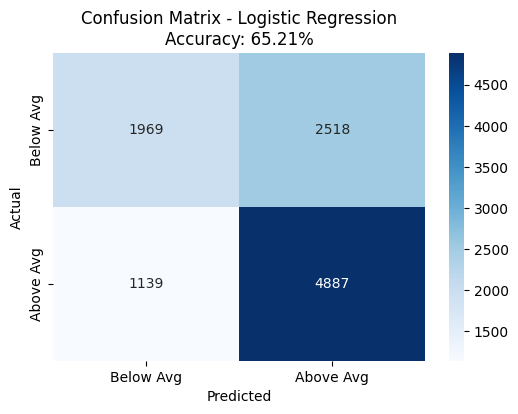

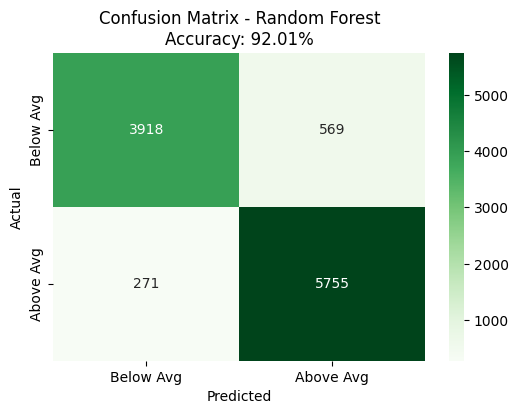

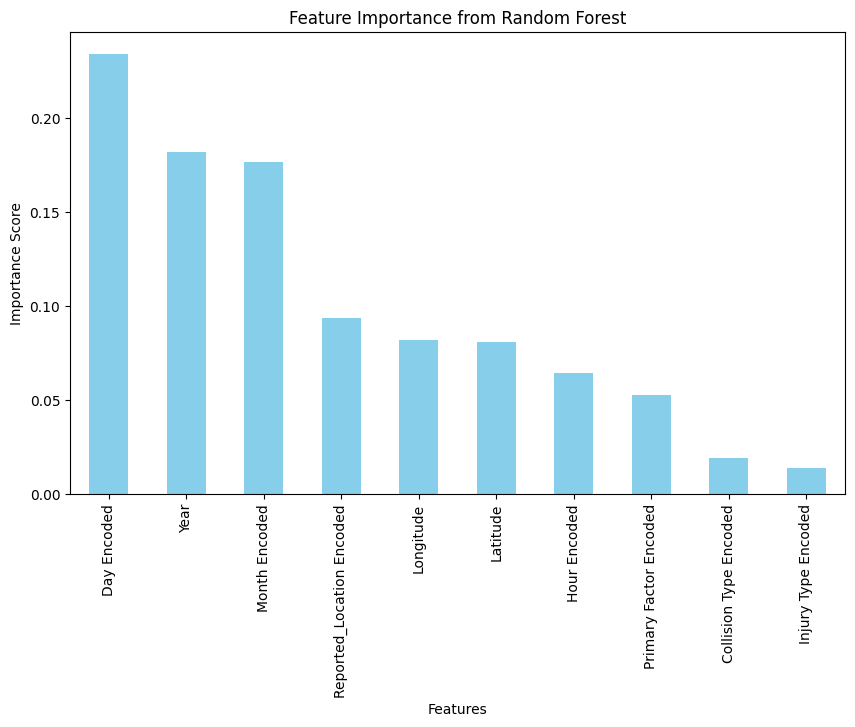

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'/content/new dataset.xlsx'  # Change this to your dataset path if needed
df = pd.read_excel(file_path)

# Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(subset=['Weekend?', 'Hour', 'Primary Factor', 'Collision Type'], inplace=True)
df.fillna('Unknown', inplace=True)

# Correct 'Hour' column format
df["Hour"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Hour"] = df["Hour"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Hour"] = pd.to_datetime(df["Hour"], format='%H:%M', errors='coerce').dt.time

# Encode categorical features
le = LabelEncoder()
df['Day Encoded'] = le.fit_transform(df['Day'])
df['Month Encoded'] = le.fit_transform(df['Month'])
df['Collision Type Encoded'] = le.fit_transform(df['Collision Type'])
df['Injury Type Encoded'] = le.fit_transform(df['Injury Type'])
df['Primary Factor Encoded'] = le.fit_transform(df['Primary Factor'])
df['Reported_Location'] = df['Reported_Location'].astype(str).fillna('Unknown')
df['Reported_Location Encoded'] = le.fit_transform(df['Reported_Location'])

# Convert 'Hour' to numerical format
df['Hour Encoded'] = df['Hour'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)
hour_encoded_mode = df['Hour Encoded'].mode()[0]
df['Hour Encoded'].fillna(hour_encoded_mode, inplace=True)

# Replace 'Unknown' or other string values in numerical columns with -1
df.replace('Unknown', -1, inplace=True)

# Ensure all features are numeric
features = ['Day Encoded', 'Month Encoded', 'Latitude', 'Longitude', 'Hour Encoded',
            'Collision Type Encoded', 'Injury Type Encoded', 'Primary Factor Encoded', 'Year',
            'Reported_Location Encoded']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df.fillna(-1, inplace=True)  # Replace any remaining NaNs with -1

# Calculate daily accident count and target variable
daily_accidents = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Accident Count')
average_accidents = daily_accidents['Accident Count'].mean()
daily_accidents['Above Average'] = (daily_accidents['Accident Count'] > average_accidents).astype(int)
df = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Above Average']], on=['Year', 'Month', 'Day'], how='left')

# Select features and target variable for classification
X = df[features]
y = df['Above Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
success_logistic = accuracy_logistic * 100  # Success Percentage
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
success_rf = accuracy_rf * 100  # Success Percentage
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Linear Regression for Accident Count Prediction
df_aligned = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Accident Count']], on=['Year', 'Month', 'Day'], how='inner')
X_reg_aligned = df_aligned[features]
y_reg_aligned = df_aligned['Accident Count']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_aligned, y_reg_aligned, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_model.predict(X_test_reg)
r_squared = linear_model.score(X_test_reg, y_test_reg)

# Calculating p-values for each coefficient in linear regression
p_values = []
for i in range(X_train_reg.shape[1]):
    slope, intercept, r_value, p_value, std_err = stats.linregress(X_train_reg.iloc[:, i], y_train_reg)
    p_values.append(p_value)

# Feature Importances from Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=features)

# Data Summary for Visualization
results_data = {
    "Model": ["Logistic Regression", "Random Forest", "Linear Regression"],
    "Accuracy": [accuracy_logistic, accuracy_rf, None],
    "Success Percentage": [f"{success_logistic:.2f}%", f"{success_rf:.2f}%", None],
    "R-Squared": [None, None, r_squared]
}

# Summary DataFrame
summary_df = pd.DataFrame(results_data)

# Display Summary and Important Features
print("Summary of Model Results:\n", summary_df)
print("\nFeature Importances from Random Forest:\n", feature_importances_rf.sort_values(ascending=False))

# Visualizations

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title(f"Confusion Matrix - Logistic Regression\nAccuracy: {success_logistic:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title(f"Confusion Matrix - Random Forest\nAccuracy: {success_rf:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importances Bar Plot
plt.figure(figsize=(10, 6))
feature_importances_rf.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()





Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      0.44      0.52      4487
           1       0.66      0.81      0.73      6026

    accuracy                           0.65     10513
   macro avg       0.65      0.63      0.62     10513
weighted avg       0.65      0.65      0.64     10513


Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      4487
           1       0.91      0.96      0.93      6026

    accuracy                           0.92     10513
   macro avg       0.92      0.91      0.92     10513
weighted avg       0.92      0.92      0.92     10513

Summary of Model Results:
                  Model  Accuracy Success Percentage
0  Logistic Regression  0.652430             65.24%
1        Random Forest  0.920099             92.01%


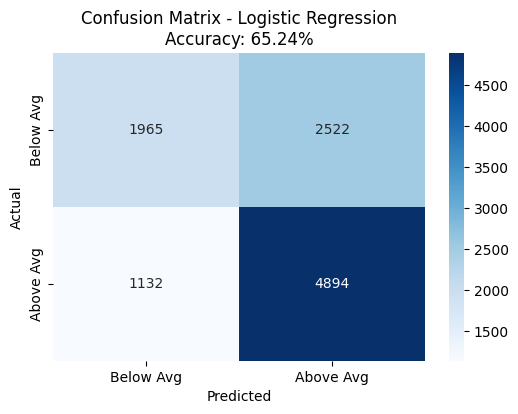

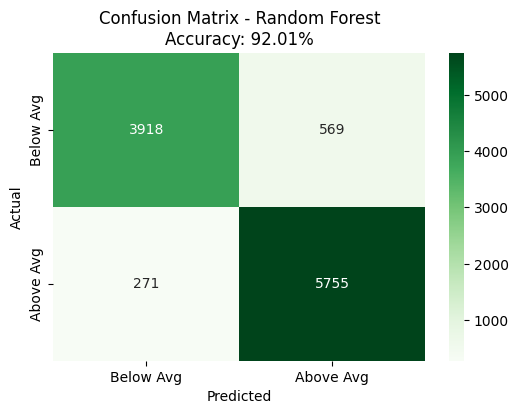

In [ ]:
# Display Classification Reports for both models
print("Classification Report - Logistic Regression:\n", classification_rep_logistic)
print("\nClassification Report - Random Forest:\n", classification_rep_rf)

# Summary DataFrame for model performance
results_data = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_logistic, accuracy_rf],
    "Success Percentage": [f"{accuracy_logistic * 100:.2f}%", f"{accuracy_rf * 100:.2f}%"]
}

# Summary DataFrame
summary_df = pd.DataFrame(results_data)
print("Summary of Model Results:\n", summary_df)

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title(f"Confusion Matrix - Logistic Regression\nAccuracy: {accuracy_logistic * 100:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title(f"Confusion Matrix - Random Forest\nAccuracy: {accuracy_rf * 100:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Variance Inflation Factors:
                       Feature          VIF
0                 Day Encoded     3.818957
1               Month Encoded     3.618947
2                    Latitude  8946.458338
3                   Longitude  8942.439150
4                Hour Encoded    22.672666
5      Collision Type Encoded     2.210743
6         Injury Type Encoded    24.851916
7      Primary Factor Encoded    20.414727
8                        Year    64.219355
9   Reported_Location Encoded     3.466473
10         Hour_PrimaryFactor    19.986658
Logistic Regression Accuracy: 65.24%
Linear Regression R-Squared: 0.121

Linear Regression Model Summary:
                             OLS Regression Results                            
Dep. Variable:         Accident Count   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1263.
Date:                Sun, 22 Sep

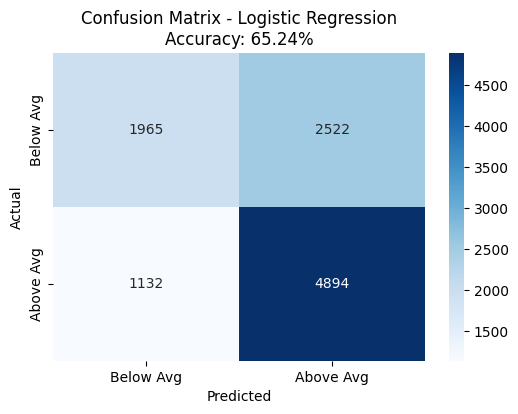

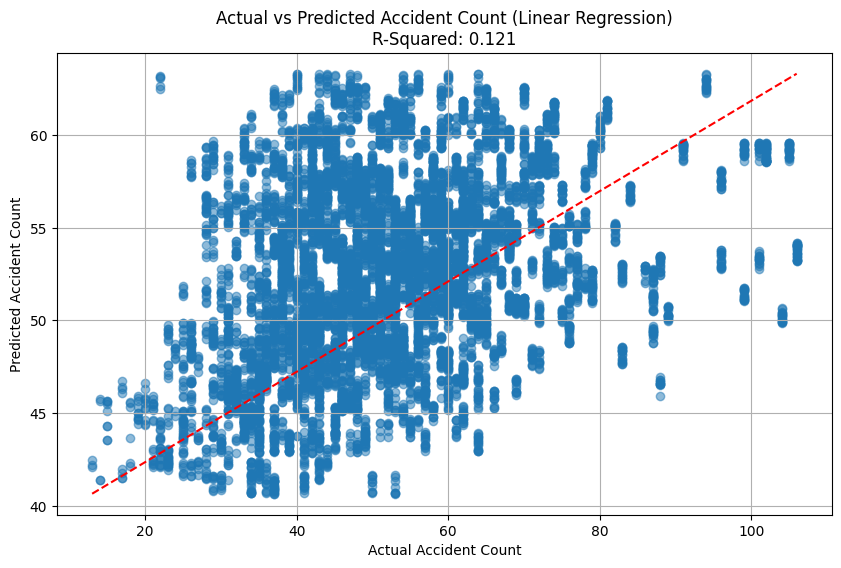

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'/content/new dataset.xlsx'
df = pd.read_excel(file_path)

# Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(subset=['Weekend?', 'Hour', 'Primary Factor', 'Collision Type'], inplace=True)
df.fillna('Unknown', inplace=True)

# Correct 'Hour' column format
df["Hour"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Hour"] = df["Hour"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Hour"] = pd.to_datetime(df["Hour"], format='%H:%M', errors='coerce').dt.time

# Encode categorical features
le = LabelEncoder()
df['Day Encoded'] = le.fit_transform(df['Day'])
df['Month Encoded'] = le.fit_transform(df['Month'])
df['Collision Type Encoded'] = le.fit_transform(df['Collision Type'])
df['Injury Type Encoded'] = le.fit_transform(df['Injury Type'])
df['Primary Factor Encoded'] = le.fit_transform(df['Primary Factor'])
df['Reported_Location'] = df['Reported_Location'].astype(str).fillna('Unknown')
df['Reported_Location Encoded'] = le.fit_transform(df['Reported_Location'])

# Convert 'Hour' to numerical format
df['Hour Encoded'] = df['Hour'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)
hour_encoded_mode = df['Hour Encoded'].mode()[0]
df['Hour Encoded'].fillna(hour_encoded_mode, inplace=True)

# Replace 'Unknown' or other string values in numerical columns with -1
df.replace('Unknown', -1, inplace=True)

# Ensure all features are numeric
features = ['Day Encoded', 'Month Encoded', 'Latitude', 'Longitude', 'Hour Encoded',
            'Collision Type Encoded', 'Injury Type Encoded', 'Primary Factor Encoded', 'Year',
            'Reported_Location Encoded']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df.fillna(-1, inplace=True)  # Replace any remaining NaNs with -1

# Add Interaction Terms for Linear Regression (e.g., Hour*Primary Factor)
df['Hour_PrimaryFactor'] = df['Hour Encoded'] * df['Primary Factor Encoded']
features_with_interactions = features + ['Hour_PrimaryFactor']

# Calculate daily accident count and target variable
daily_accidents = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Accident Count')
average_accidents = daily_accidents['Accident Count'].mean()
daily_accidents['Above Average'] = (daily_accidents['Accident Count'] > average_accidents).astype(int)
df = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Above Average']], on=['Year', 'Month', 'Day'], how='left')

# Feature Selection using VIF to avoid multicollinearity
X = df[features_with_interactions]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factors:\n", vif_data)

# Remove features with high VIF values (e.g., VIF > 10)
# Suppose we find 'Year' and 'Latitude' have high VIF, we remove them as an example.
selected_features = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()

# Split data for Logistic Regression (classification)
X_class = df[selected_features]
y_class = df['Above Average']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_class, y_train_class)
y_pred_logistic = logistic_model.predict(X_test_class)
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
success_logistic = accuracy_logistic * 100  # Convert accuracy to percentage
classification_rep_logistic = classification_report(y_test_class, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_class, y_pred_logistic)
print(f"Logistic Regression Accuracy: {success_logistic:.2f}%")

# Linear Regression for Accident Count Prediction
df_aligned = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Accident Count']], on=['Year', 'Month', 'Day'], how='inner')
X_reg_aligned = df_aligned[selected_features]
y_reg_aligned = df_aligned['Accident Count']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_aligned, y_reg_aligned, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
y_pred_reg = linear_model.predict(X_test_reg)
r_squared = linear_model.score(X_test_reg, y_test_reg)
print(f"Linear Regression R-Squared: {r_squared:.3f}")

# Calculating p-values for each coefficient in linear regression using statsmodels
X_train_reg_sm = sm.add_constant(X_train_reg)  # Adds constant term to the model
linear_model_sm = sm.OLS(y_train_reg, X_train_reg_sm).fit()
print("\nLinear Regression Model Summary:\n", linear_model_sm.summary())

# Visualizations

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title(f"Confusion Matrix - Logistic Regression\nAccuracy: {success_logistic:.2f}%")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting Actual vs Predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_pred_reg), max(y_pred_reg)], 'r--')
plt.xlabel('Actual Accident Count')
plt.ylabel('Predicted Accident Count')
plt.title(f'Actual vs Predicted Accident Count (Linear Regression)\nR-Squared: {r_squared:.3f}')
plt.grid()
plt.show()



NaN Values in Features Before Imputation:
 Day Encoded                      0
Month Encoded                    0
Latitude                         0
Longitude                        0
Hour Encoded                     0
Collision Type Encoded           0
Injury Type Encoded              0
Primary Factor Encoded           0
Year                             0
Reported_Location Encoded        0
Hour_PrimaryFactor               0
Collision_Injury                 0
Latitude_Log                     0
Longitude_Log                47750
dtype: int64
NaN Values After Imputation:
 Day Encoded                  0
Month Encoded                0
Latitude                     0
Longitude                    0
Hour Encoded                 0
Collision Type Encoded       0
Injury Type Encoded          0
Primary Factor Encoded       0
Year                         0
Reported_Location Encoded    0
Hour_PrimaryFactor           0
Collision_Injury             0
Latitude_Log                 0
Longitude_Log        

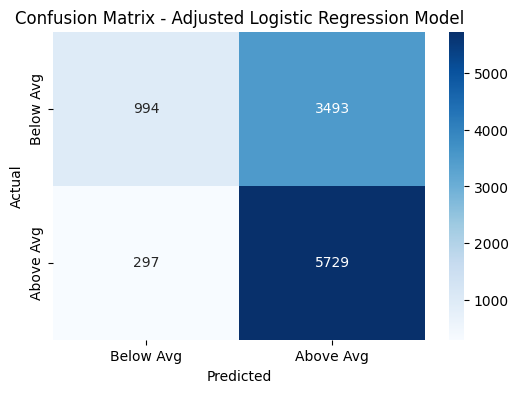

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r'/content/new dataset.xlsx'
df = pd.read_excel(file_path)

# Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(subset=['Weekend?', 'Hour', 'Primary Factor', 'Collision Type'], inplace=True)
df.fillna('Unknown', inplace=True)

# Correct 'Hour' column format
df["Hour"] = df["Hour"].apply(lambda x: str(x).replace(".0", "").zfill(4))
df["Hour"] = df["Hour"].apply(lambda x: (x[:2]) + ":" + (x[2:4]))
df["Hour"] = pd.to_datetime(df["Hour"], format='%H:%M', errors='coerce').dt.time

# Encode categorical features
le = LabelEncoder()
df['Day Encoded'] = le.fit_transform(df['Day'])
df['Month Encoded'] = le.fit_transform(df['Month'])
df['Collision Type Encoded'] = le.fit_transform(df['Collision Type'])
df['Injury Type Encoded'] = le.fit_transform(df['Injury Type'])
df['Primary Factor Encoded'] = le.fit_transform(df['Primary Factor'])
df['Reported_Location'] = df['Reported_Location'].astype(str).fillna('Unknown')
df['Reported_Location Encoded'] = le.fit_transform(df['Reported_Location'])

# Convert 'Hour' to numerical format
df['Hour Encoded'] = df['Hour'].apply(lambda x: x.hour if pd.notnull(x) else np.nan)
hour_encoded_mode = df['Hour Encoded'].mode()[0]
df['Hour Encoded'].fillna(hour_encoded_mode, inplace=True)

# Replace 'Unknown' or other string values in numerical columns with -1
df.replace('Unknown', -1, inplace=True)

# Ensure all features are numeric
features = ['Day Encoded', 'Month Encoded', 'Latitude', 'Longitude', 'Hour Encoded',
            'Collision Type Encoded', 'Injury Type Encoded', 'Primary Factor Encoded', 'Year',
            'Reported_Location Encoded']
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df.fillna(-1, inplace=True)  # Replace any remaining NaNs with -1

# Additional Feature Engineering: Binning and Transformations
df['Hour_Binned'] = pd.cut(df['Hour Encoded'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['Latitude_Log'] = np.log1p(df['Latitude'].replace(-1, 0))  # Log transformation, replacing -1 to avoid log(0)
df['Longitude_Log'] = np.log1p(df['Longitude'].replace(-1, 0))

# One-Hot Encoding for Binned Features
df = pd.get_dummies(df, columns=['Hour_Binned'], drop_first=True)

# Add Interaction Terms
df['Hour_PrimaryFactor'] = df['Hour Encoded'] * df['Primary Factor Encoded']
df['Collision_Injury'] = df['Collision Type Encoded'] * df['Injury Type Encoded']
features_with_interactions = features + ['Hour_PrimaryFactor', 'Collision_Injury', 'Latitude_Log', 'Longitude_Log']

# Calculate daily accident count and target variable (Above Average)
daily_accidents = df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Accident Count')
average_accidents = daily_accidents['Accident Count'].mean()
daily_accidents['Above Average'] = (daily_accidents['Accident Count'] > average_accidents).astype(int)

# Merge the 'Above Average' column back into the main dataframe
df = pd.merge(df, daily_accidents[['Year', 'Month', 'Day', 'Above Average']], on=['Year', 'Month', 'Day'], how='left')

# Check for NaN values in the feature set
print("NaN Values in Features Before Imputation:\n", df[features_with_interactions].isnull().sum())

# Impute NaN values using median strategy
imputer = SimpleImputer(strategy='median')
df[features_with_interactions] = imputer.fit_transform(df[features_with_interactions])

# Confirm no NaN values remain
print("NaN Values After Imputation:\n", df[features_with_interactions].isnull().sum())

# Define features and target variable for classification
X = df[features_with_interactions]
y = df['Above Average']

# Standardize Features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Recursive Feature Elimination (RFE) with Logistic Regression
logistic = LogisticRegression(max_iter=200, solver='liblinear')
rfe = RFE(logistic, n_features_to_select=10)  # Select top 10 features
rfe = rfe.fit(X_standardized, y)

# Select features based on RFE results
selected_features = X.columns[rfe.support_].tolist()
print(f"Selected Features: {selected_features}")

# Handle Class Imbalance using Resampling (if necessary)
# Check for class distribution
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

if class_distribution[0] > class_distribution[1] * 1.5:  # Imbalance threshold
    df_majority = df[df['Above Average'] == 0]
    df_minority = df[df['Above Average'] == 1]
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # sample with replacement
                                     n_samples=class_distribution[0],    # to match majority class
                                     random_state=42) # reproducible results

    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    X = df_upsampled[selected_features]
    y = df_upsampled['Above Average']
    print("After Resampling Class Distribution:\n", y.value_counts())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using Randomized Search
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],      # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga']  # Suitable solvers for L1 and L2
}
random_search = RandomizedSearchCV(logistic, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Adjust Threshold to Maximize F1-Score or Precision
# Use precision-recall curve to determine best threshold
y_proba = best_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Find the threshold that maximizes F1-Score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold for F1-Score: {best_threshold:.2f}")

# Predict using the best threshold
y_pred_adjusted = (y_proba >= best_threshold).astype(int)

# Model Performance
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_proba)

print(f"Best Logistic Regression Model: {best_model}")
print(f"Accuracy: {accuracy_adjusted * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc_adjusted:.2f}")

# Confusion Matrix
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=['Below Avg', 'Above Avg'], yticklabels=['Below Avg', 'Above Avg'])
plt.title("Confusion Matrix - Adjusted Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


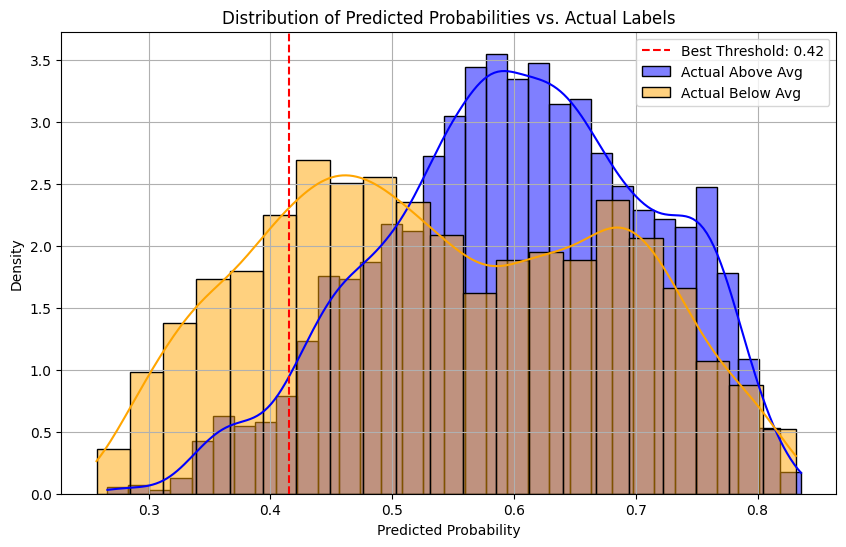

In [ ]:
# Plot Distribution of Predicted Probabilities vs. Actual Labels
plt.figure(figsize=(10, 6))
sns.histplot(y_proba[y_test == 1], color='blue', label='Actual Above Avg', kde=True, stat='density')
sns.histplot(y_proba[y_test == 0], color='orange', label='Actual Below Avg', kde=True, stat='density')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.title("Distribution of Predicted Probabilities vs. Actual Labels")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


#בדיקה נעימה
#😃🤖💻